In [64]:
import scarlink.src.chromatin_potential as scp
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scanpy as sc
import numpy as np
import pickle
import pandas

# Mouse skin

Run SCARlink on subset of cells from the mouse skin data. The subset comprises of all cells of the following cell types: Hair Shaft-cuticle.cortex, IRS, Medulla, TAC-1, and TAC-2. SCARlink was run on the top 5000 highly variable genes. We used the UMAP coordinates reported in Ma et al., 2020. 

In [2]:
# SCARlink output directory
mouse_skin_dir = "mouse_skin_subset_10k/"
# UMAP coordinates
mouse_skin_umap = pandas.read_csv(mouse_skin_dir + "umap.csv", sep=',')[['umap1', 'umap2']].values

#### Run chromatin potential

In [3]:
mouse_skin_chrom_p = scp.create_object(mouse_skin_dir, celltype_col='celltype', umap=mouse_skin_umap)

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
invalid value encountered in divide


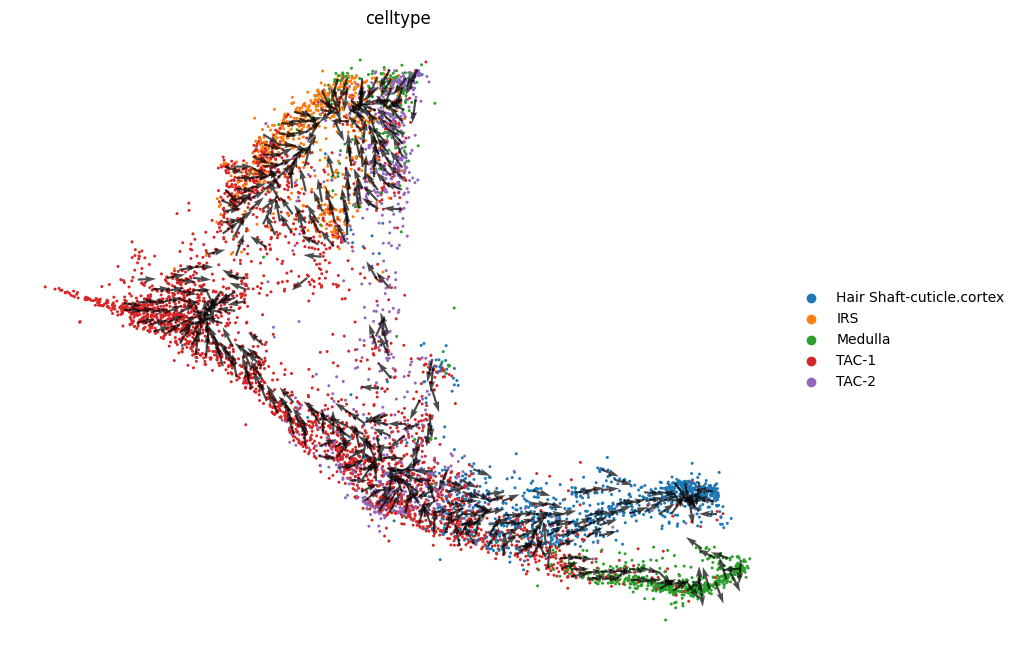

In [4]:
scp.plot_arrows(mouse_skin_chrom_p, smooth_w=50, alpha=0.7)

# BMMC

Run SCARlink on cells from BMMC with sample ids site1_donor1, site1_donor2, site1_donor3, site2_donor1, site2_donor4, site2_donor5, site3_donor10, site3_donor6, site3_donor7, and site4_donor9 and the cell types HSC, MK/E progenitor, proerythroblast, erythroblast, and normoblast. SCARlink was originally run on top 5000 highly variable genes. Here we will estimate chromatin potential using the top 2000 highly variable genes. We will plot it on a force directed layout generated by the chromatin potential analysis.

In [6]:
# SCARlink output directory
bmmc_dir = "bmmc_all_out_10k/"
# Separately saved list of top 2000 genes
bmmc_hvg2000 = pandas.read_csv(bmmc_dir + "hvg2000.txt", sep='\t', header=None)[0].values.tolist()

#### Run chromatin potential

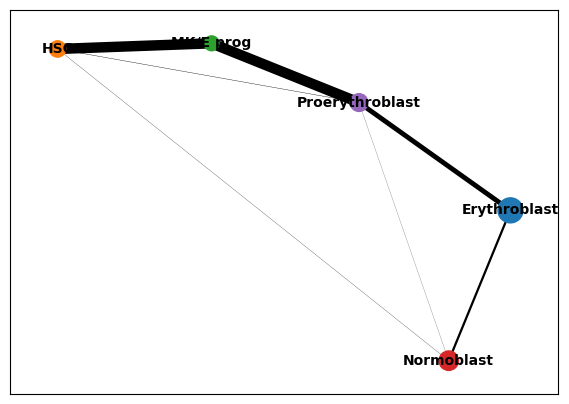

In [7]:
bmmc_chrom_p = scp.create_object(bmmc_dir, celltype_col='cell_type')

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
invalid value encountered in divide


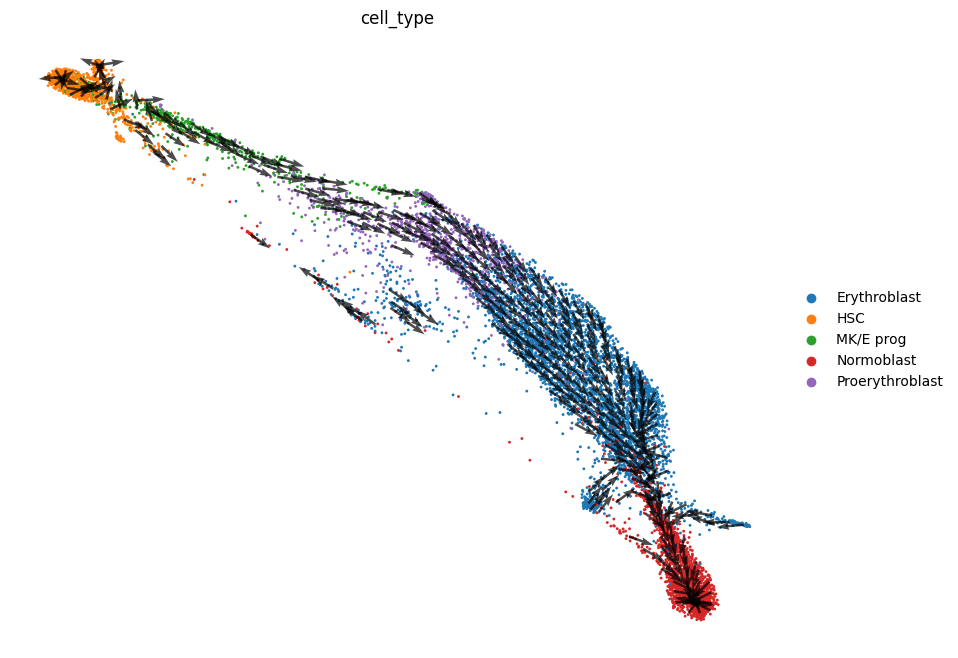

In [9]:
scp.plot_arrows(bmmc_chrom_p, smooth_w=50, alpha=0.7, genes=bmmc_hvg2000)

# Pituitary

Run SCARlink on cells from Pituitary multiome. SCARlink was originally run on top 5000 highly variable genes. Here we will estimate chromatin potential using the top 2000 highly variable genes. We will plot it on a force directed layout generated by the chromatin potential analysis.

In [10]:
# SCARlink output directory
pituitary_dir = "pituitary_all_out_10k/"
# Separately saved list of top 2000 genes
pituitary_hvg2000 = pandas.read_csv(pituitary_dir + "hvg2000.txt", sep='\t', header=None)[0].values.tolist()

#### Run chromatin potential

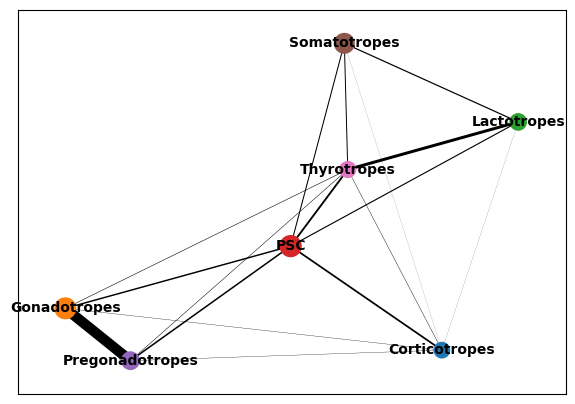

In [11]:
pituitary_chrom_p = scp.create_object(pituitary_dir, celltype_col='celltype')

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
invalid value encountered in divide


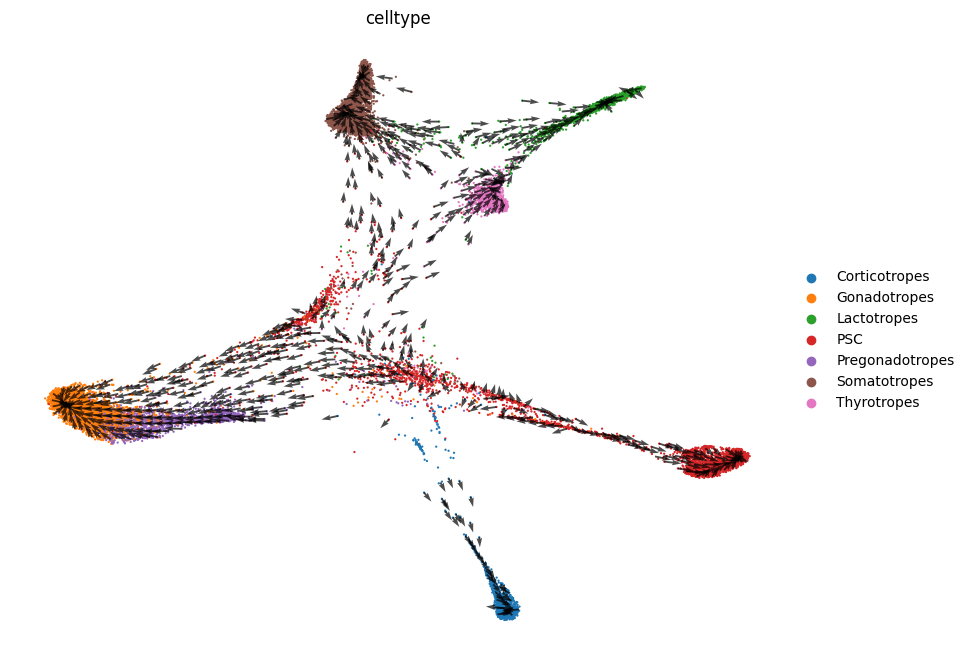

In [14]:
scp.plot_arrows(pituitary_chrom_p, smooth_w=70, scale=9e-4, alpha=0.7, min_count=1, genes=pituitary_hvg2000)

# Developing human cortex

Run SCARlink on cells from developing human cortex multiome for sample ids hft_ctx_w21_dc2r2_r1 and hft_ctx_w21_dc2r2_r2 and cell types cycling progenitor, mGPC/OPC, SP, RG, nIPC/GluN1, GluN2, GluN3, GluN4, GluN5. SCARlink was originally run on top 5000 highly variable genes. We estimate chromatin potential for a subset of genes identified by hierarchical clustering.

Link to detailed analysis: https://github.com/snehamitra/SCARlink/blob/main/notebooks/chromatin_potential.ipynb

In [8]:
# SCARlink output directory
cortex_dir = "human_cortex_all_out_10k/"
# LSI file name 
cortex_lsi_file = cortex_dir + "scatac_LSI_50.csv"

#### Run chromatin potential

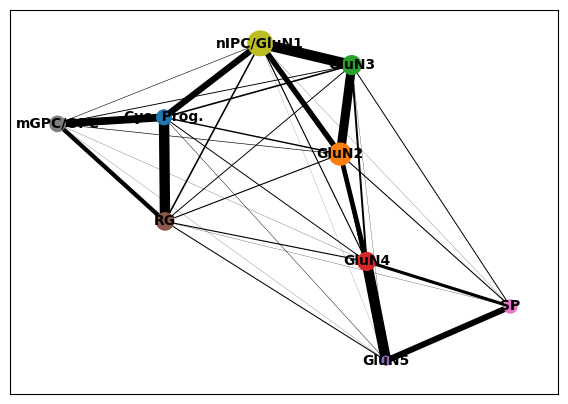

In [9]:
# lsi_file is an optional argument. By default the file named scatac_LSI.csv saved within 
# SCARlink output directory is used. We can supply a diffent LSI matrix; for example
# one with different dimensions. Here, the default LSI matrix saved within cortex_dir
# has 30 dimensions. We are providing a separate lsi_file with 50  dimensions.
cortex_chrom_p = scp.create_object(cortex_dir, celltype_col='celltype', lsi_file=cortex_lsi_file)

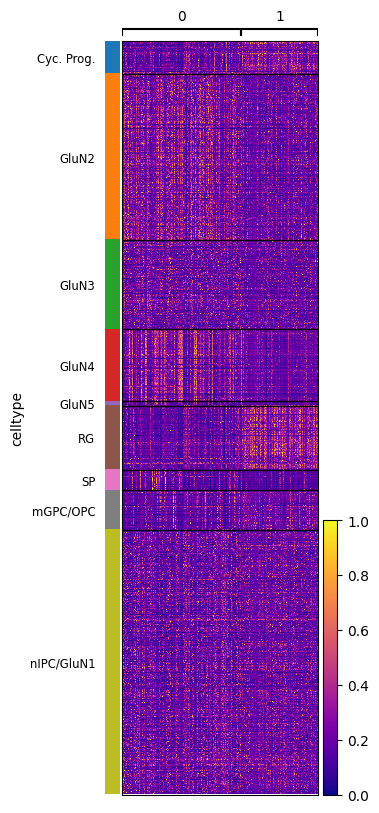

In [10]:
# cluster genes
cortex_genes = scp.cluster_genes(cortex_chrom_p, n_clust=2)

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
invalid value encountered in divide


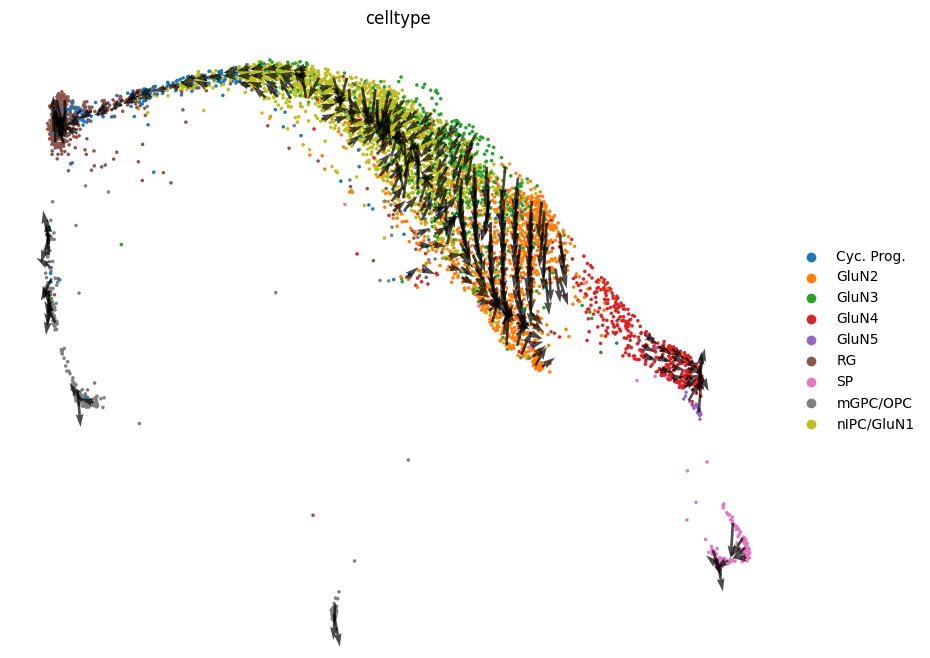

In [11]:
# all genes
scp.plot_arrows(cortex_chrom_p, smooth_w=50, alpha=0.7)

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
invalid value encountered in divide


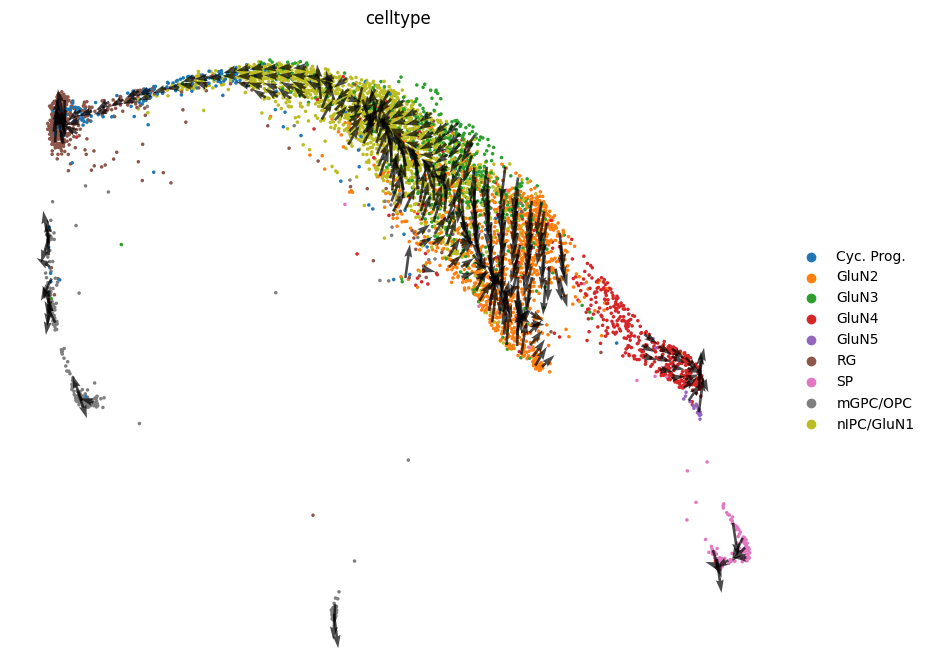

In [13]:
# genes on cluster 0
scp.plot_arrows(cortex_chrom_p, genes=cortex_genes['0'], smooth_w=50, alpha=0.7)

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
invalid value encountered in divide


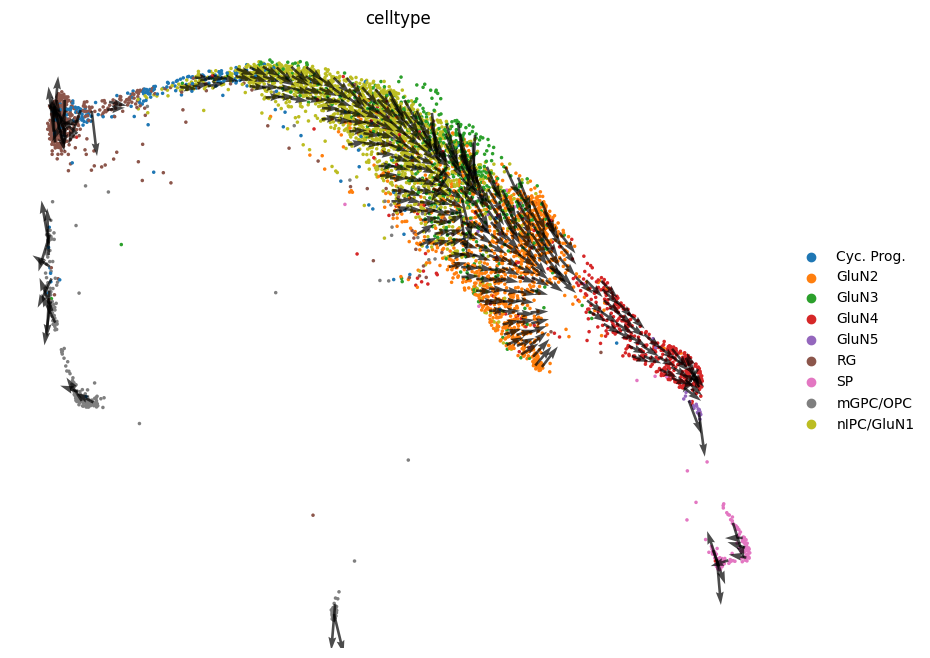

In [14]:
# genes on cluster 1
scp.plot_arrows(cortex_chrom_p, genes=cortex_genes['1'], smooth_w=50, alpha=0.7)

#### Plot mean gene expression

In [25]:
cortex_chrom_p['pred'].obsm['X_draw_graph_fa'] = cortex_chrom_p['obs'].obsm['X_draw_graph_fa'].copy()
cortex_chrom_p['pred'].uns['draw_graph'] = cortex_chrom_p['obs'].uns['draw_graph'].copy()

In [58]:
scaler = MinMaxScaler()
cortex_chrom_p['pred'].obs['avg_exp'] = np.mean(scaler.fit_transform(cortex_chrom_p['pred'].X), axis=1)
cortex_chrom_p['obs'].obs['avg_exp'] = np.mean(scaler.fit_transform(cortex_chrom_p['obs'].X), axis=1)
cortex_chrom_p['pred'].obs['avg_exp_c1'] = np.mean(scaler.fit_transform(cortex_chrom_p['pred'][:, cortex_chrom_p['pred'].var_names.isin(cortex_genes['1'])].X), axis=1)
cortex_chrom_p['obs'].obs['avg_exp_c1'] = np.mean(scaler.fit_transform(cortex_chrom_p['obs'][:, cortex_chrom_p['obs'].var_names.isin(cortex_genes['1'])].X), axis=1)

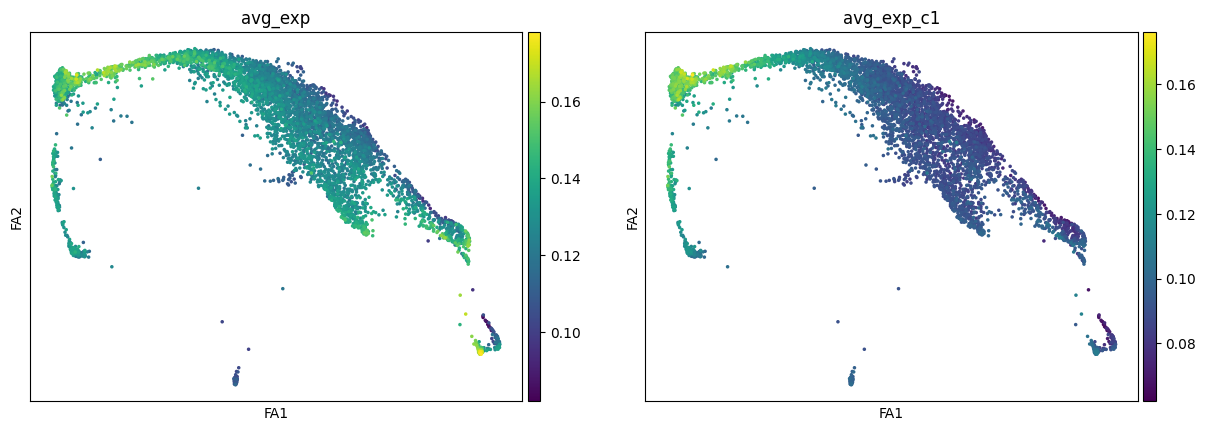

In [59]:
# average observed gene expression of all genes and genes in cluster 1
sc.pl.draw_graph(cortex_chrom_p['pred'], color=['avg_exp', 'avg_exp_c1'], cmap='viridis')

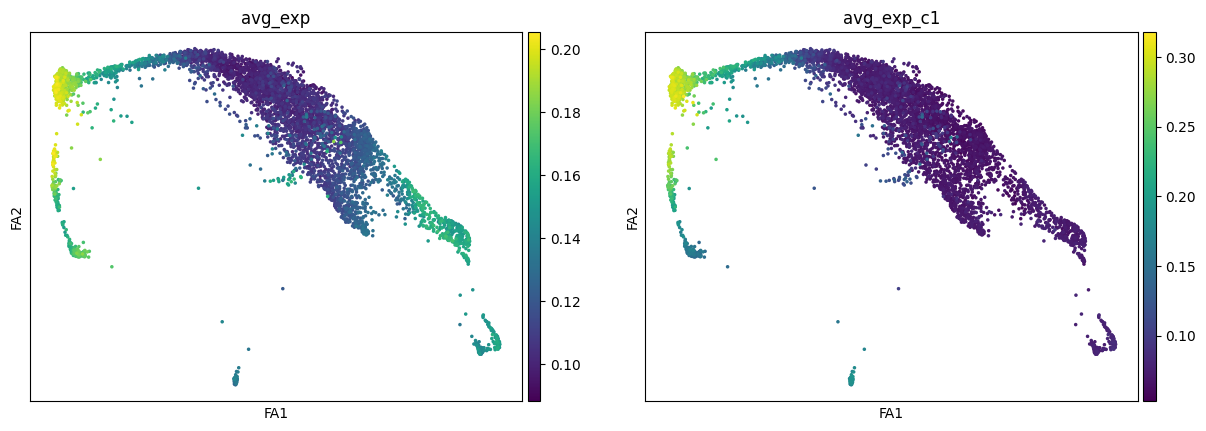

In [60]:
# average predicted gene expression of all genes and genes in cluster 1
sc.pl.draw_graph(cortex_chrom_p['obs'], color=['avg_exp', 'avg_exp_c1'], cmap='viridis')

In [61]:
cortex_chrom_p['pred'].obs['avg_exp_diff'] = cortex_chrom_p['pred'].obs['avg_exp'].values - cortex_chrom_p['obs'].obs['avg_exp'].values
cortex_chrom_p['pred'].obs['avg_exp_c1_diff'] = cortex_chrom_p['pred'].obs['avg_exp_c1'].values - cortex_chrom_p['obs'].obs['avg_exp_c1'].values

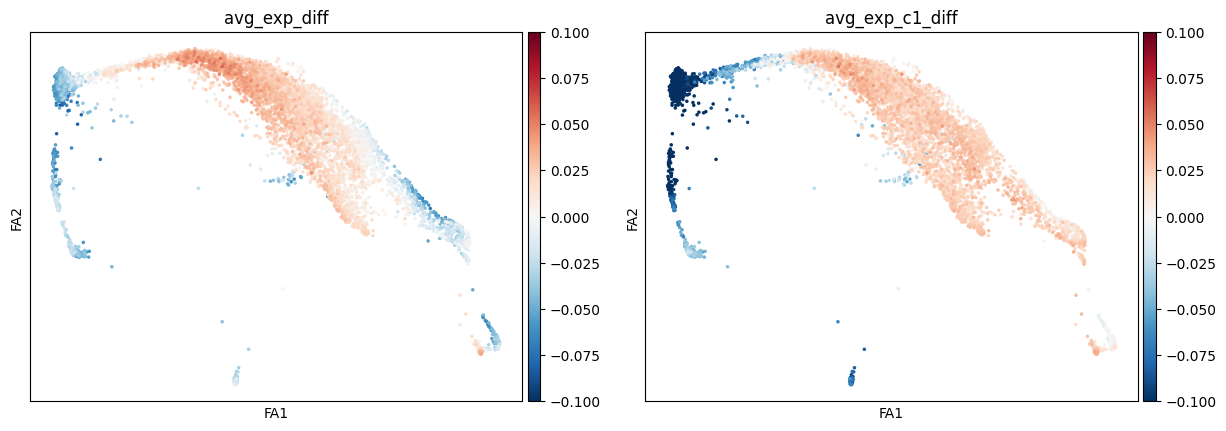

In [63]:
# average difference of predicted and observed gene expression of all genes and genes in cluster 1
sc.pl.draw_graph(cortex_chrom_p['pred'], color=['avg_exp_diff', 'avg_exp_c1_diff'], cmap='RdBu_r', vmin=-0.1, vmax=0.1)